In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Загрузка данных

In [4]:
import glob
import os

In [5]:
csv_files = glob.glob('/content/*.csv')
dfs = [pd.read_csv(file) for file in csv_files]

In [6]:
df1, df2, df3, df4, df5, df6 = dfs

# Визуализация

In [16]:
df1.head()

,Date,Count
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [31]:
def view_df(df, column_x, column_y):
    plt.figure(figsize=(12, 4))
    plt.plot(df[column_x], df[column_y], marker='o')
    plt.xlabel(column_x)
    plt.ylabel(column_y)
    plt.title(f'Временной ряд: {column_y} по {column_x}')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

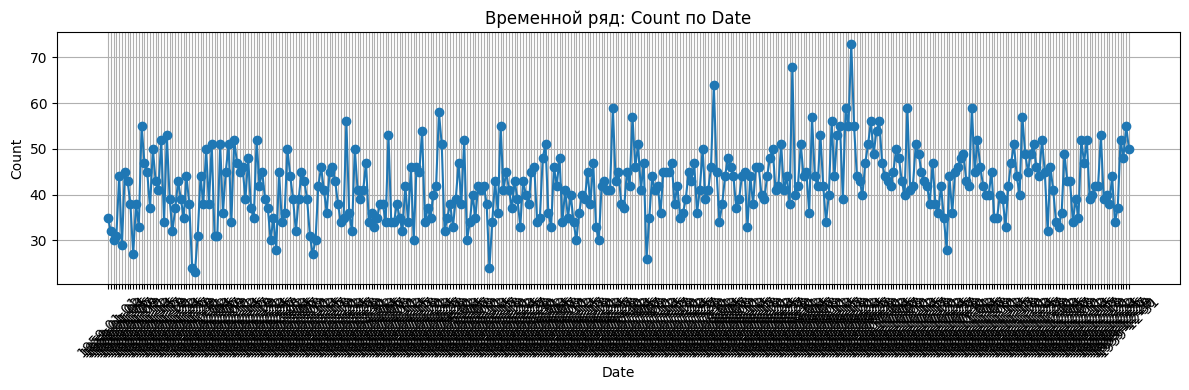

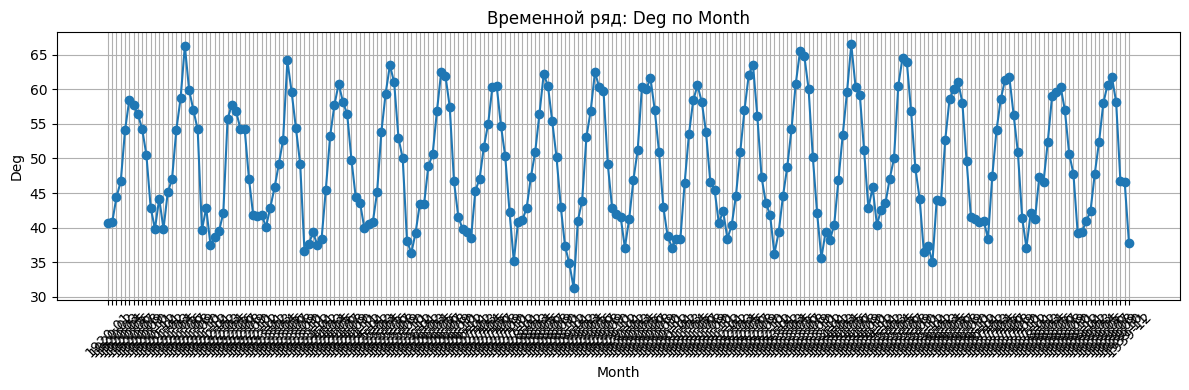

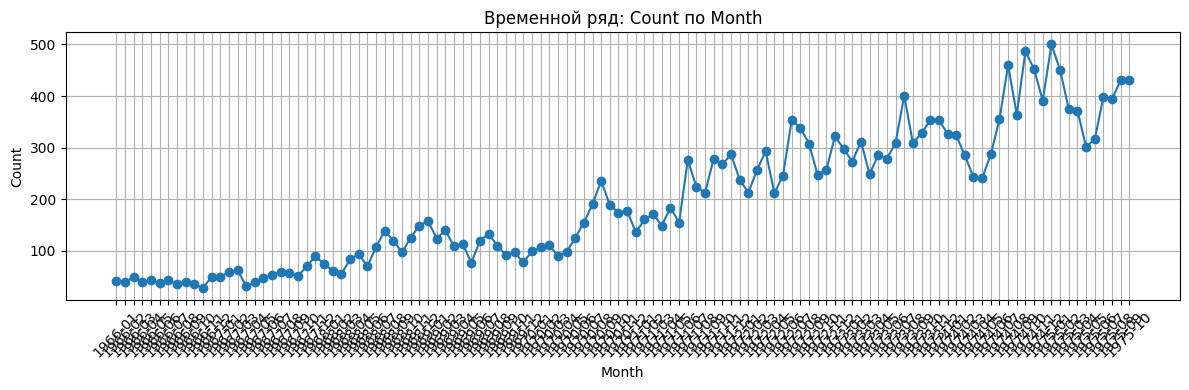

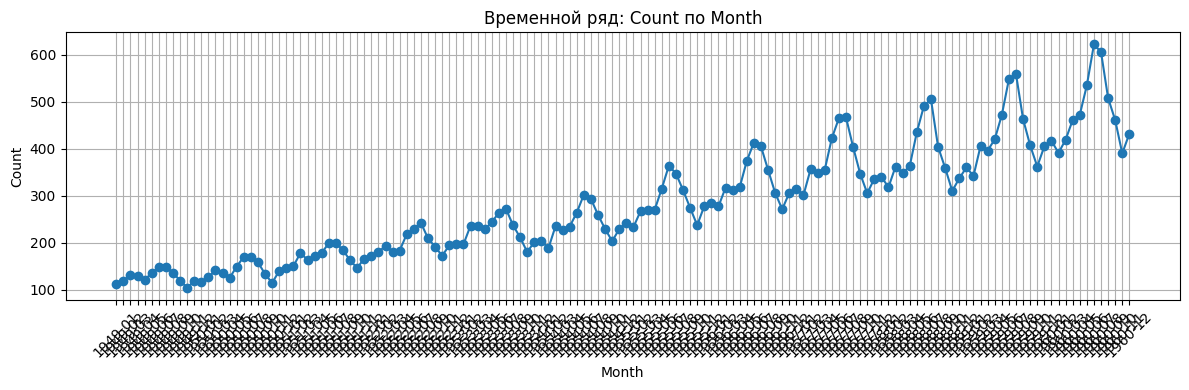

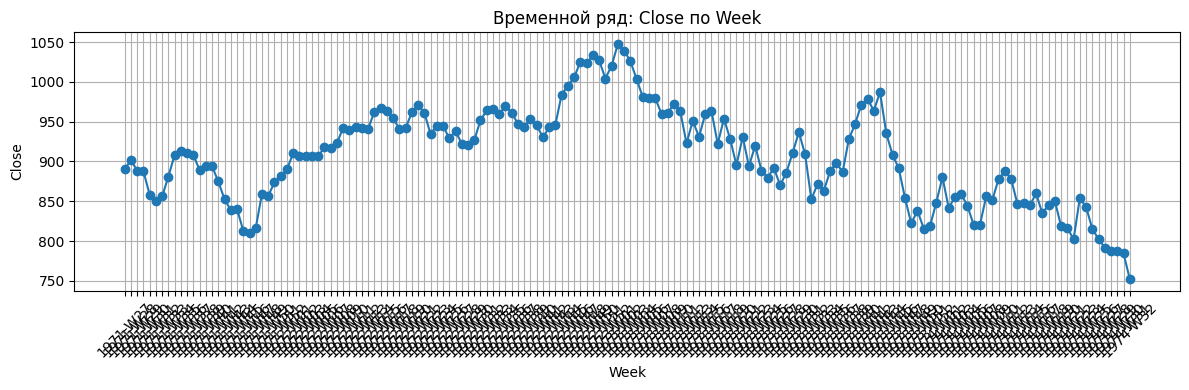

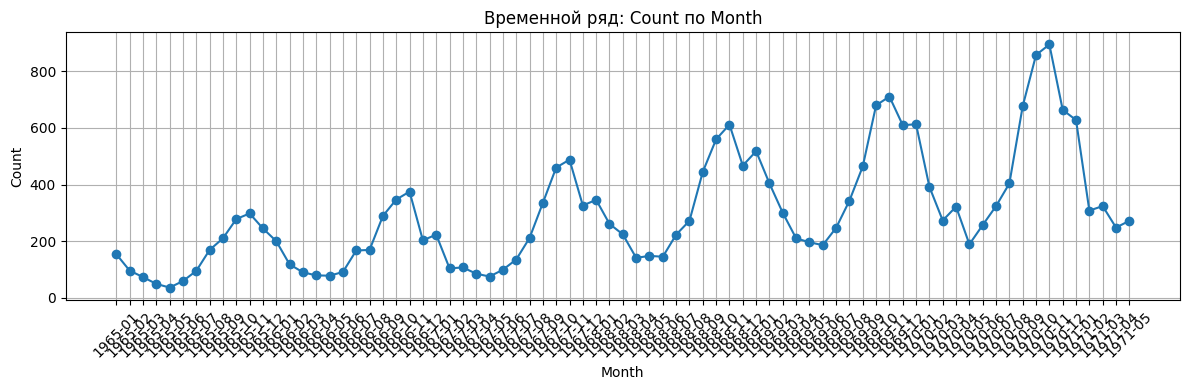

In [51]:
view_df(df1,'Date', 'Count')
view_df(df2,'Month', 'Deg')
view_df(df3,'Month', 'Count')
view_df(df4,'Month', 'Count')
view_df(df5,'Week', 'Close')
view_df(df6,'Month', 'Count')

Что я увидела:

df1 - похож на стационарный, нужно его проверить

df2 - циклы

df3 - тренд

df4 - тренд и сезонность

df5 - цикл + тренд

df6 - тренд + цикл

# Проверка на стационарность

In [53]:
from statsmodels.tsa.stattools import adfuller

def check_stationarity(ts, title=''):
    result = adfuller(ts.dropna())
    print(f"--- {title} ---")
    print(f"ADF Statistic: {result[0]:.4f}")
    print(f"p-value: {result[1]:.4f}")
    print("Stationary" if result[1] < 0.05 else "Non-stationary")
    print()

In [ ]:
view_df(df1,'Date', 'Count')
view_df(df2,'Month', 'Deg')
view_df(df3,'Month', 'Count')
view_df(df4,'Month', 'Count')
view_df(df5,'Week', 'Close')
view_df(df6,'Month', 'Count')

In [55]:
check_stationarity(df1['Count'], "DF1")
check_stationarity(df2['Deg'], "DF2")
check_stationarity(df3['Count'], "DF3")
check_stationarity(df4['Count'], "DF4")
check_stationarity(df5['Close'], "DF5")
check_stationarity(df6['Count'], "DF6")

--- DF1 ---
ADF Statistic: -4.8083
p-value: 0.0001
Stationary

--- DF2 ---
ADF Statistic: -3.2555
p-value: 0.0170
Stationary

--- DF3 ---
ADF Statistic: 1.0011
p-value: 0.9943
Non-stationary

--- DF4 ---
ADF Statistic: 0.8154
p-value: 0.9919
Non-stationary

--- DF5 ---
ADF Statistic: -1.3146
p-value: 0.6225
Non-stationary

--- DF6 ---
ADF Statistic: 0.6547
p-value: 0.9889
Non-stationary



Второй все-таки не стационарен, у него есть сезонность, а ADF это не улавливает, поэтому второй df тоже буду преобразовывать

# Преобразование временных рядов

Универсальная функция на каждый случай
* Если есть тренд + логарифмирование
* Нет тренда - только дифференцирование для того, чтобы убрать сезонность

In [64]:
def transform_to_stationary(df, col, log=False, diff_order=1, seasonal_diff=None, new_col_name='transformed'):
    series = df[col].copy()

    if log:
        series = np.log(series.replace(0, np.nan))

    for _ in range(diff_order):
        series = series.diff()

    if seasonal_diff:
        series = series.diff(seasonal_diff)

    df[new_col_name] = series
    return df

In [65]:
df2_transformed = transform_to_stationary(df2, 'Deg', log=False, diff_order=0, seasonal_diff=12)
df3_transformed = transform_to_stationary(df3, 'Count', log=True, diff_order=1)
df4_transformed = transform_to_stationary(df4, 'Count', log=True, diff_order=1, seasonal_diff=12)
df5_transformed = transform_to_stationary(df5, 'Close', log=True, diff_order=1)
df6_transformed = transform_to_stationary(df6, 'Count', log=True, diff_order=1)

# Проверка после преобразований

In [67]:
check_stationarity(df2_transformed['transformed'], "DF2 transformed")
check_stationarity(df3_transformed['transformed'], "DF3 transformed")
check_stationarity(df4_transformed['transformed'], "DF4 transformed")
check_stationarity(df5_transformed['transformed'], "DF5 transformed")
check_stationarity(df6_transformed['transformed'], "DF6 transformed")

--- DF2 transformed ---
ADF Statistic: -6.0725
p-value: 0.0000
Stationary

--- DF3 transformed ---
ADF Statistic: -7.6018
p-value: 0.0000
Stationary

--- DF4 transformed ---
ADF Statistic: -4.4433
p-value: 0.0002
Stationary

--- DF5 transformed ---
ADF Statistic: -12.9958
p-value: 0.0000
Stationary

--- DF6 transformed ---
ADF Statistic: -3.1356
p-value: 0.0240
Stationary



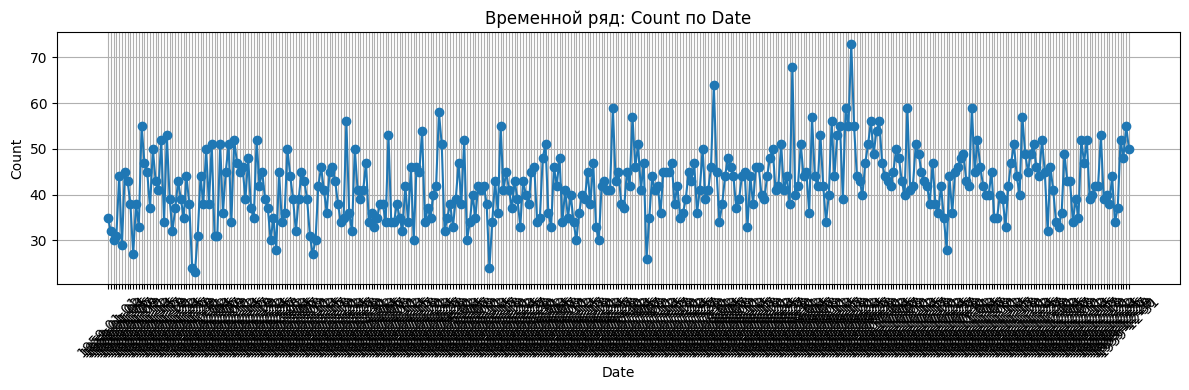

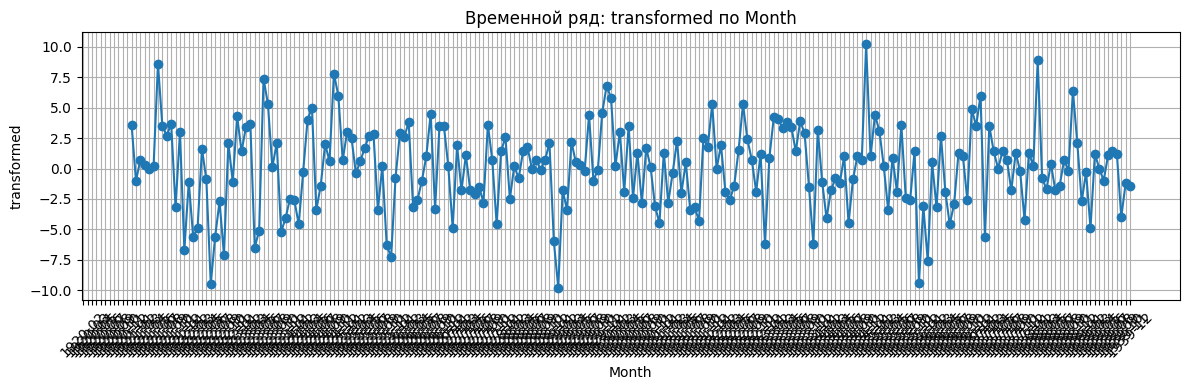

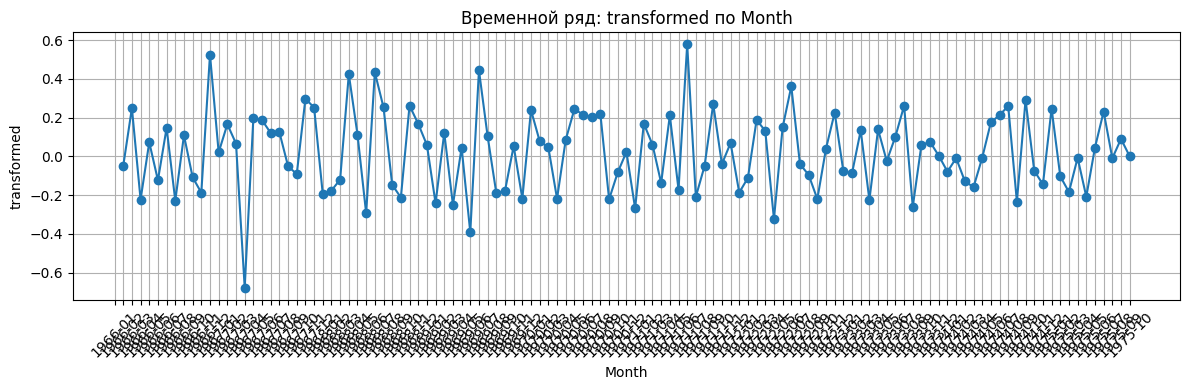

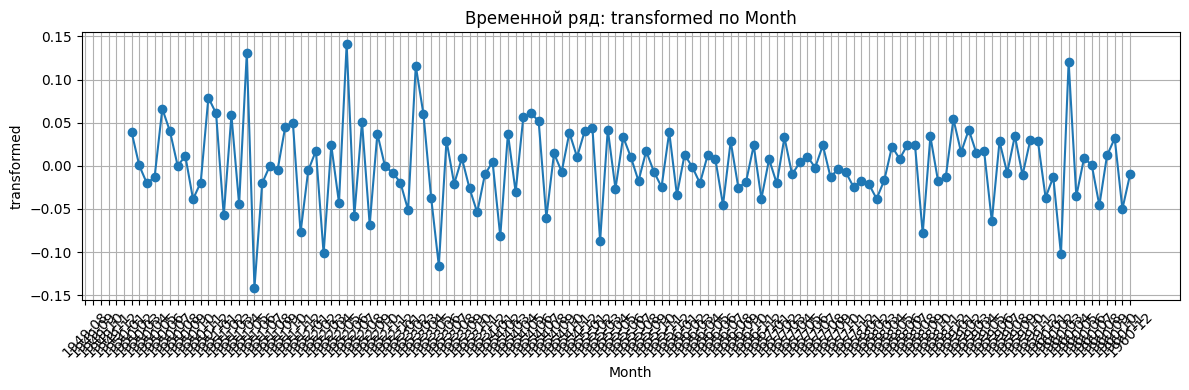

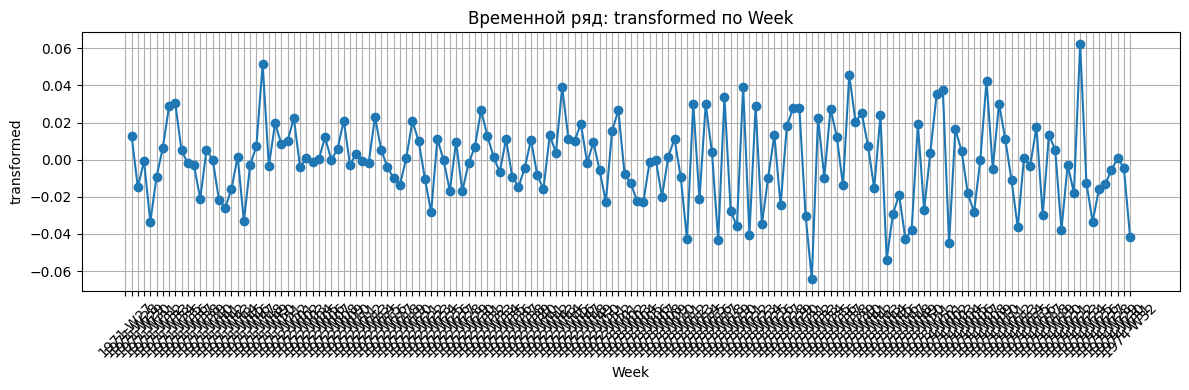

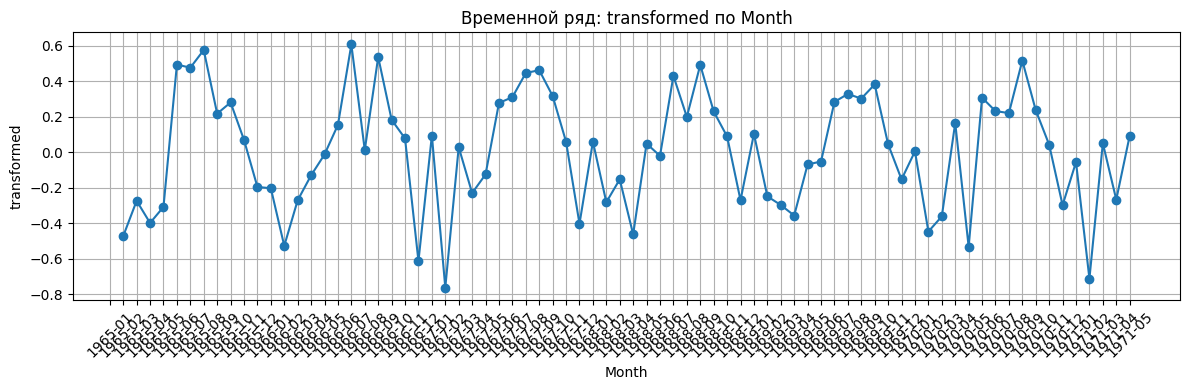

In [69]:
view_df(df1,'Date', 'Count')
view_df(df2_transformed,'Month', 'transformed')
view_df(df3_transformed,'Month', 'transformed')
view_df(df4_transformed,'Month', 'transformed')
view_df(df5_transformed,'Week', 'transformed')
view_df(df6_transformed,'Month', 'transformed')